# Exploracion de Datos

Cristobal Donoso Oliva<br>
Universidad de Concepcion, Chile<br>
cridonoso@inf.udec.cl<br>


_Viernes 16 de Octubre del 2020_

### Shortcuts

* Ctrl + Enter: Ejecutar un celda
* Shift + Enter: Ejecutar una celda y avanzar a la siguiente
* Tab: Autcompletar sentencia

In [1]:
import numpy as np
import pandas as pd
import pylab as pl

## MovieLens dataset
*Tutorial inspirado en [Kaynig-Fittkau & Greg Reda (2013)](http://www.gregreda.com/2013/10/26/using-pandas-on-the-movielens-dataset/)*

La [base de datos MovieLens](http://grouplens.org/datasets/movielens/) es una recopilacion de calificaciones de peliculas desde el sitio [MovieLens](https://movielens.org/)

Iniciaremos cargando las tablas [users](http://files.grouplens.org/datasets/movielens/ml-100k/u.user), [ratings](http://files.grouplens.org/datasets/movielens/ml-100k/u.data), y [movies](http://files.grouplens.org/datasets/movielens/ml-100k/u.item) data

Lo primero que debemos notar es que la tabla de datos no posee encabezado *(del ingles header)*
![vista previa tabla](images/0.png)<br>
por lo tanto, debemos entregarle una lista con el nombre de las columnas al momento de cargar los datos

In [2]:
# Definimos el nombre de las columnas
u_cols = ['id_usuario', 'edad', 'sexo', 'profesion', 'c_postal']

# Leemos desde el link
usuarios_df = pd.read_csv('http://files.grouplens.org/datasets/movielens/ml-100k/u.user', 
                          sep='|', # Separador de columnas
                          names=u_cols)

Las demas tablas se leen de manera similar, solo debemos cambiar algunos parametros como: ```link```, ```header```, ```separador```. 
<br><br> **Cree una funcion que lea un link y devuelva un dataframe**

In [3]:
def leer_csv(link, header, separador=','):
    '''
    Funcion que lee un csv y retorna un DataFrame
    
    params:
        link [string]: url del csv
        header [lista]: nombre de las columnas
        separador [string]: string separador (default: ',')
    return:
        pandas dataframe
    '''
    df = [] # Tu codigo aca
    return df

In [10]:
# Definimos el nombre de las columnas
link_ratings   = 'http://files.grouplens.org/datasets/movielens/ml-100k/u.data'
ratings_header = ['id_usuario', 'id_pelicula', 'calificacion', 'unix_timestamp']
ratings_separador = '\t'

calificaciones_df = leer_csv(link_ratings, ratings_header, ratings_separador)

In [5]:
link_peliculas = 'http://files.grouplens.org/datasets/movielens/ml-100k/u.item'
peliculas_header = ['id_pelicula', 'titulo', 'lanzamiento', 'imdb_url']
peliculas_separador = '|'

peliculas_df = leer_csv(link_peliculas, peliculas_header, peliculas_separador)

Al parecer, la ultima tabla de peliculas requiere de un procesamiento un poco mas extenso. Si observamos el csv,
![tabla de peliculas](./images/1.png)
<br>
La tabla de peliculas tiene mas columnas que las definidas en el header ```peliculas_header```. Ademas, segun el error de lectura:
<br>
![tabla de peliculas](./images/2.png)
<br>
hay [caracteres especiales](https://es.wikipedia.org/wiki/ISO/IEC_8859-1) que pandas no puede codificar a priori. 



Para resolver estos problemas, podemos modificar nuestra funcion de la siguiente manera:

In [6]:
def leer_csv(link, header, separador, **kwargs):
    '''
    Funcion que lee un csv y retorna un DataFrame
    
    params:
        link [string]: url del csv
        header [lista]: nombre de las columnas
        separador [string]: string separador (default: ',')
        **kwargs: otros argumentos para el metodo read_csv 
    return:
        pandas dataframe
    '''
    df = pd.read_csv(link, sep=separador, names=header, **kwargs)
    return df

el argumento ```**kwargs``` es un <u>diccionario</u> el cual tomara todos los *key:value* que sean recibidos como parametros de la funcion. La **ventaja** de utilizar ```kwargs``` es que podemos dar la posibilidad al usuario de **ingresar otros argumentos** que sean validos para la funcion ```pd.read_csv``` pero que **nosotros no especificamos a priori**

In [7]:
peliculas_df = leer_csv(link_peliculas, peliculas_header, peliculas_separador, 
                        usecols=[0,1,2,4], # Solo sacaremos la columnas de interes
                        encoding = 'latin1') # latin1 (ISO 8859-1) para incluir caracteres especiales
peliculas_df.head()

,id_pelicula,titulo,lanzamiento,imdb_url
0,1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...
1,2,GoldenEye (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?GoldenEye%20(...
2,3,Four Rooms (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Four%20Rooms%...
3,4,Get Shorty (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Get%20Shorty%...
4,5,Copycat (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Copycat%20(1995)


Ahora que hemos cargado nuestras tablas podemos visualizar rapidamente aquellos **estadisticos descriptivos** que nos permitan caracterizar o definir los datos rapidamente. 

#### Tabla ```usuarios_df```

#### Tabla ```calificaciones_df```

#### Tabla ```peliculas_df```

## Operaciones entre frames 

Las tablas que acabamos de leer poseen columnas compartidas las cuales podemos cruzar para extraer mas informacion.

### Merge

La operacion ```merge``` de pandas nos permite juntar dos dataframes por medio de alguna columna compartida. Por ejemplo, la tablas ```calificaciones_df``` y ```peliculas_df``` comparten la columna ```id_pelicula```

In [59]:
print(calificaciones_df.columns)
print(peliculas_df.columns)

Index(['id_usuario', 'id_pelicula', 'calificacion', 'unix_timestamp'], dtype='object')
Index(['id_pelicula', 'titulo', 'lanzamiento', 'imdb_url'], dtype='object')


Para juntar ambos frames solo debemos hacer:

In [60]:
# create one merged DataFrame
peliculas_calificaciones = pd.merge(peliculas_df, calificaciones_df, on='id_pelicula')

[Aqui puedes ver](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html) un muy buen tutorial respecto a operaciones entre frames 

## Filtrando DataFrames

Podemos filtrar filas por valor/es en una o mas columnas por ej:

In [14]:
usuarios_adultos_df = usuarios_df[usuarios_df.edad >= 18]
usuarios_adultos_df.head()

,id_usuario,edad,sexo,profesion,c_postal
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [15]:
usuarios_adolescente = usuarios_df[(usuarios_df.edad >= 13) & (usuarios_df.edad<20)]
usuarios_adolescente.head()

,id_usuario,edad,sexo,profesion,c_postal
35,36,19,F,student,93117
51,52,18,F,student,55105
56,57,16,M,none,84010
66,67,17,M,student,60402
67,68,19,M,student,22904


## Divide, Opera y Combina

* Dividir una tabla en grupos que compartan algun criterio 
* Operar sobre los grupos de manera independiente
* Combinar los resultados en una nueva tabla

<img src='images/4.png'></img>

### Example: Usuarios mas activos 

En este ejemplo, buscaremos a los usuarios que mas participan en la plataforma. Dicho de otra manera, debemos **contar la cantidad de peliculas calificadas** por usuario.

Utilizaremos la funcion de Pandas para agrupar filas: [groupby](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html])

El DataFrame de calificaciones tiene una columna para usuarios (```id_usuario```) la cual puede repetirse a lo largo de toda la columna (i.e., un usuario puede calificar mas de una pelicula)

In [17]:
calificaciones_df.head()

,id_usuario,id_pelicula,calificacion,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


Por ejemplo, veamos la actividad del *usuario 196*

In [21]:
usuario_196 = calificaciones_df[calificaciones_df.id_usuario == 196]
usuario_196.head()

,id_usuario,id_pelicula,calificacion,unix_timestamp
0,196,242,3,881250949
940,196,393,4,881251863
1133,196,381,4,881251728
1812,196,251,3,881251274
1896,196,655,5,881251793


Ahora para saber la cantidad de peliculas que ha calificado, simplemente contamos las filas del dataframe:

In [22]:
usuario_196.count()

id_usuario        39
id_pelicula       39
calificacion      39
unix_timestamp    39
dtype: int64

Ok, pero ahora nos gustaria hacer este procedimiento para cada uno de los usuarios en la tabla

In [42]:
# Agrupamos el dataframe por valor en la columna user_id
df_agrupado = calificaciones_df.groupby('id_usuario')
grupos = df_agrupado.groups # accedemos a los grupos (pandas dict)

las claves en el diccionario corresponderan al id de cada usuario. Por ejemplo, si queremos acceder al usuario 196 debemos buscar el grupo 196

In [43]:
indices_usuario_196 = grupos[196]
print(indices_usuario_196)

Int64Index([    0,   940,  1133,  1812,  1896,  2374,  6910,  7517,  7842,
            10017, 10254, 10981, 13733, 14606, 16834, 17102, 17830, 18853,
            21605, 22271, 22773, 23189, 24030, 25726, 32721, 33536, 35197,
            36281, 41539, 42384, 50147, 52726, 56628, 59165, 59607, 60199,
            60706, 78787, 87863],
           dtype='int64')


Los valores corresponden a los indices de las filas donde aparece el usuario en el Dataframe. Podriamos utilizar esta informacion para **filtrar** en el DataFrame original:

In [45]:
calificaciones_df.iloc[indices_usuario_196].head()

,id_usuario,id_pelicula,calificacion,unix_timestamp
0,196,242,3,881250949
940,196,393,4,881251863
1133,196,381,4,881251728
1812,196,251,3,881251274
1896,196,655,5,881251793


Para contar las peliculas por usuarios debemos aplicar la funcion ```count()``` sobre cada grupo:

In [50]:
def contar_filas(frame):
    return frame.count()

In [52]:
# calificaciones_por_usuario = df_agrupado.count() 
# calificaciones_por_usuario = df_agrupado.apply(lambda x: x.count())
calificaciones_por_usuario = df_agrupado.apply(contar_filas)
calificaciones_por_usuario.head()

,id_usuario,id_pelicula,calificacion,unix_timestamp
id_usuario,,,,
1,272,272,272,272
2,62,62,62,62
3,54,54,54,54
4,24,24,24,24
5,175,175,175,175


Luego solo debemos ordenar el frame

In [56]:
calificaciones_por_usuario.sort_values('id_pelicula', ascending=False).head()

,id_usuario,id_pelicula,calificacion,unix_timestamp
id_usuario,,,,
405,737,737,737,737
655,685,685,685,685
13,636,636,636,636
450,540,540,540,540
276,518,518,518,518


## Ejercicio 2: Cuales son las 10 peliculas mas calificadas?

In [63]:
peliculas_calificaciones.head()

,id_pelicula,titulo,lanzamiento,imdb_url,id_usuario,calificacion,unix_timestamp
0,1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,887736532
1,1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,287,5,875334088
2,1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,148,4,877019411
3,1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,280,4,891700426
4,1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,66,3,883601324


In [70]:
# peliculas_calificaciones.groupby(['id_pelicula', 'titulo']).size().head(10)
# peliculas_calificaciones.titulo.value_counts().head(10)

## Binning

Una de las operaciones que solemos ocupar sobre los datos es la "estratificacion". En nuestro ejemplo podriamos asignar una categoria o estrato basado en el rango de edad de un usuario:

Utilizando la funcion [```cut()```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html) podemos ordenar los datos en bins

In [71]:
# Lets create age groups
etiquetas = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
usuarios_df['grupo_edad'] = pd.cut(usuarios_df['edad'], range(0, 81, 10), right=False, labels=etiquetas)
usuarios_df.head(10)

,id_usuario,edad,sexo,profesion,c_postal,grupo_edad
0,1,24,M,technician,85711,20-29
1,2,53,F,other,94043,50-59
2,3,23,M,writer,32067,20-29
3,4,24,M,technician,43537,20-29
4,5,33,F,other,15213,30-39
5,6,42,M,executive,98101,40-49
6,7,57,M,administrator,91344,50-59
7,8,36,M,administrator,05201,30-39
8,9,29,M,student,01002,20-29
9,10,53,M,lawyer,90703,50-59


## Pivoteando

Una [tabla pivote](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) resume otra tabla por medio de operaciones como promedio o adicion, tipicamente inluye agrupar los datos. 
<br><br>
Para ver un ejemplo, calculemos la calificacion media entre mujeres y hombres para cada pelicula

In [77]:
cal_pel_usu = pd.merge(usuarios_df, peliculas_calificaciones, on='id_usuario')
cal_pel_usu.head()

,id_usuario,edad,sexo,profesion,c_postal,grupo_edad,id_pelicula,titulo,lanzamiento,imdb_url,calificacion,unix_timestamp
0,1,24,M,technician,85711,20-29,1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,5,874965758
1,1,24,M,technician,85711,20-29,2,GoldenEye (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?GoldenEye%20(...,3,876893171
2,1,24,M,technician,85711,20-29,3,Four Rooms (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Four%20Rooms%...,4,878542960
3,1,24,M,technician,85711,20-29,4,Get Shorty (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Get%20Shorty%...,3,876893119
4,1,24,M,technician,85711,20-29,5,Copycat (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Copycat%20(1995),3,889751712


In [80]:
import numpy as np

In [83]:
tabla_pivote = cal_pel_usu.pivot_table(index=['id_pelicula', 'titulo'], # Indices tabla pivote (groupby) 
                                               columns=['sexo'], # Columnas tabla pivote
                                               aggfunc=np.mean, # Funcion a aplicar
                                               values='calificacion', # Valores sobre los cuales aplicar la funcion
                                               fill_value=0) # Relleno para valores faltantes 
tabla_pivote.head()

,sexo,F,M
id_pelicula,titulo,,
1,Toy Story (1995),451,1302
2,GoldenEye (1995),64,356
3,Four Rooms (1995),43,230
4,Get Shorty (1995),153,589
5,Copycat (1995),83,201


## Ejercicio 3

Visualizar la calificacion promedio por grupo de edad

In [117]:
import matplotlib.pyplot as plt

In [118]:
%%time
tabla_pivote_2 = cal_pel_usu.pivot_table(index=['titulo'],
                                         columns=['grupo_edad'],
                                         values='calificacion',
                                         fill_value=-1)

CPU times: user 82.5 ms, sys: 794 µs, total: 83.3 ms
Wall time: 80.5 ms


Las peliculas mejores calificadas por rango de edad 

In [174]:
muestra_aleatoria = tabla_pivote_2.sample(n=20)
muestra_aleatoria

grupo_edad,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79
titulo,,,,,,,,
Some Kind of Wonderful (1987),-1,4.000000,3.638889,3.714286,3.571429,-1.000000,-1.000000,-1.0
Lady of Burlesque (1943),-1,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4.000000,-1.0
"Beans of Egypt, Maine, The (1994)",-1,-1.000000,3.000000,-1.000000,4.000000,-1.000000,-1.000000,-1.0
"Last Time I Committed Suicide, The (1997)",-1,-1.000000,2.166667,3.000000,-1.000000,-1.000000,-1.000000,-1.0
Casper (1995),-1,3.600000,3.291667,2.428571,3.571429,-1.000000,2.000000,-1.0
Night Flier (1997),-1,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,-1.0
"Cure, The (1995)",-1,3.666667,2.000000,5.000000,-1.000000,-1.000000,-1.000000,-1.0
"Lost World: Jurassic Park, The (1997)",3,2.750000,2.769231,3.088235,3.233333,3.000000,3.000000,4.0
Taxi Driver (1976),-1,4.600000,4.191176,4.060000,4.000000,3.944444,4.250000,-1.0


Text(0, 0.5, 'Calificacion Promedio')

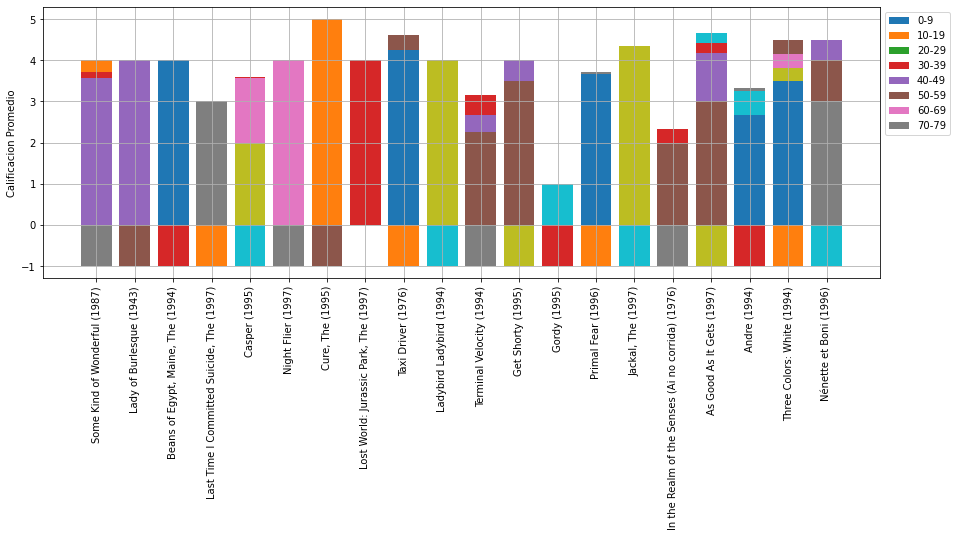

In [175]:
fig, ax = plt.subplots(1, 1, figsize=(15,5))

for indice, row in muestra_aleatoria.iterrows():
    for k, col in enumerate(row):
        ax.bar(indice, col)

ax.legend(muestra_aleatoria.columns, bbox_to_anchor=(1, 1))
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

ax.grid()     
ax.set_ylabel('Calificacion Promedio')